In [1]:
#Use "%" for plotting software to work

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
%pylab inline
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


C:\Users\vivian.wang1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('Media Data.csv')

In [3]:
data = data.fillna(0)
data.tail()

,Month,natleads,natoff,naton,nattotal,natcpl,natoffratio,natoncpl,inleads,inoff,...,watotstock,juldummy,seasq1,seasq2,seasq3,seasq4,natoffon,natoffonstock,csi,modummy
72,7/31/2017,18917,2759275.73,1742119.0,4501394.727,237.955000,1.583862,92.092774,1694,95072.86289,...,321950.7608,1,1,0,0,0,4.810000e+12,6.670000e+12,93.4,7
73,8/31/2017,23934,3132388.39,2143769.0,5276157.386,220.446118,1.461159,89.570026,2131,211287.82550,...,421920.4068,1,1,0,0,0,6.720000e+12,1.080000e+13,96.8,8
74,9/30/2017,18814,2930679.54,1922523.0,4853202.538,257.956975,1.524392,102.185766,1644,90777.39551,...,438342.1454,1,1,0,0,0,5.630000e+12,9.170000e+12,95.1,9
75,10/31/2017,17965,1562028.80,1440805.0,3002833.798,167.149112,1.084136,80.200668,1385,124647.77620,...,0.0000,1,0,1,0,0,2.250000e+12,4.990000e+12,100.7,10
76,11/30/2017,15098,1525836.37,983495.0,2509331.371,166.202899,1.551443,65.140747,1147,87640.53961,...,0.0000,1,0,1,0,0,1.500000e+12,3.040000e+12,98.5,11


In [4]:
data['Month'] = pd.to_datetime(data['Month']).apply(lambda x: x.to_julian_date())

In [5]:
dataL3Y = data[-36:]
dataL3Y.shape

(36, 85)

In [6]:
dataL3Y.head()

,Month,natleads,natoff,naton,nattotal,natcpl,natoffratio,natoncpl,inleads,inoff,...,watotstock,juldummy,seasq1,seasq2,seasq3,seasq4,natoffon,natoffonstock,csi,modummy
41,2457022.5,10304,261397.1400,952185.0,1213582.140,117.777770,0.274523,92.409259,901,175481.9835,...,298566.7506,0,0,1,0,0,2.490000e+11,5.080000e+11,93.6,12
42,2457053.5,14707,255979.1744,1611291.0,1867270.174,126.964723,0.158866,109.559461,1366,162583.0272,...,525831.3486,0,0,0,1,0,4.120000e+11,7.360000e+11,98.1,1
43,2457081.5,11799,255310.5274,1127011.0,1382321.527,117.155821,0.226538,95.517501,1326,221342.0608,...,462518.3677,0,0,0,1,0,2.880000e+11,6.170000e+11,95.4,2
44,2457112.5,12579,283600.7041,1180020.0,1463620.704,116.354297,0.240336,93.808729,1377,495272.1674,...,364584.1419,0,0,0,1,0,3.350000e+11,6.510000e+11,93.0,3
45,2457142.5,13045,177000.0000,1226872.0,1403872.000,107.617631,0.144269,94.049214,1236,269712.9300,...,439719.5675,0,0,0,0,1,2.170000e+11,5.010000e+11,95.9,4


# National

<b> National Model </b>

In [7]:
#Split into natoffstock and natonstok, and add seasonaity dummies
print ("National Model")
natols = smf.ols('natleads ~ natoffstock + natonstock + juldummy + seasq2 + seasq3 + seasq4', data=data).fit()
print (natols.summary())

National Model
                            OLS Regression Results                            
Dep. Variable:               natleads   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     68.25
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           2.77e-27
Time:                        12:03:37   Log-Likelihood:                -665.00
No. Observations:                  77   AIC:                             1344.
Df Residuals:                      70   BIC:                             1360.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8005.9409    783.124  

In [8]:
print ("National Model L3Y")
natols_l3y = smf.ols('natleads ~ natoffstock + natonstock + juldummy + seasq2 + seasq3 + seasq4', data=dataL3Y).fit()
print (natols_l3y.summary())

National Model L3Y
                            OLS Regression Results                            
Dep. Variable:               natleads   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     24.57
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           3.91e-10
Time:                        12:03:37   Log-Likelihood:                -308.37
No. Observations:                  36   AIC:                             630.7
Df Residuals:                      29   BIC:                             641.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7668.1374   1788.1

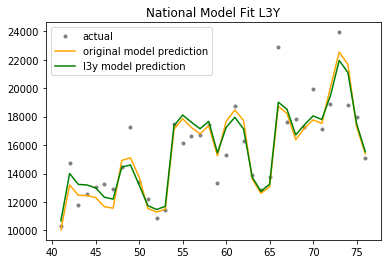

In [12]:
plt.title('National Model Fit L3Y')

line1, = plt.plot(dataL3Y['natleads'],'.',color='grey', label="actual")
line2, = plt.plot(natols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(natols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

# plt.xticks(x=labels, rotation=90)
# ax.set_xticklabels(labels)

plt.legend()

plt.savefig('Model Fits/National L3Y')

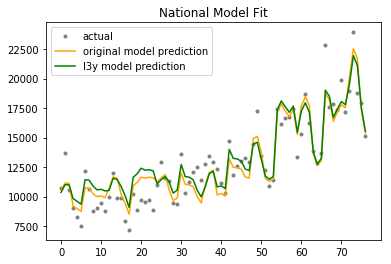

In [14]:
plt.title('National Model Fit')

# plt.xticks(x=labels, rotation=90)
# ax.set_xticklabels(labels)

line1, = plt.plot(data['natleads'],'.',color='grey', label="actual")
line2, = plt.plot(natols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(natols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/National')

In [15]:
# from pandas import Series
# series = Series.from_csv('sunspots.csv', header=0)
X = data.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 77
Training Observations: 50
Testing Observations: 27


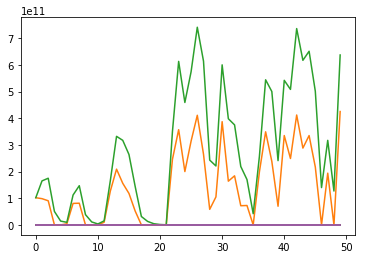

In [17]:
plt.plot(train)

plt.show()

# Indiana

<b> Indiana Model </b>

In [18]:
print ("IN Model")
inols = smf.ols('inleads ~ inoffstock + inonstock + natoffon + juldummy + seasq1 + seasq3 + seasq4', data=data).fit()
print (inols.summary())

IN Model
                            OLS Regression Results                            
Dep. Variable:                inleads   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           7.63e-12
Time:                        12:06:28   Log-Likelihood:                -520.52
No. Observations:                  77   AIC:                             1057.
Df Residuals:                      69   BIC:                             1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    718.5605    116.150      6.186

In [19]:
print ("IN Model L3Y")
inols_l3y = smf.ols('inleads ~ inoffstock + inonstock + natoffon + juldummy + seasq1 + seasq3 + seasq4', data=dataL3Y).fit()
print (inols_l3y.summary())

IN Model L3Y
                            OLS Regression Results                            
Dep. Variable:                inleads   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     22.60
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           6.11e-10
Time:                        12:06:29   Log-Likelihood:                -225.25
No. Observations:                  36   AIC:                             466.5
Df Residuals:                      28   BIC:                             479.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    379.3148    121.172      3

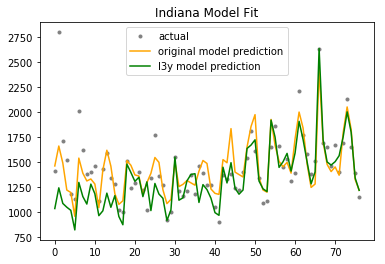

In [20]:
plt.title('Indiana Model Fit')

line1, = plt.plot(data['inleads'],'.',color='grey', label="actual")
line2, = plt.plot(inols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(inols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Indiana')

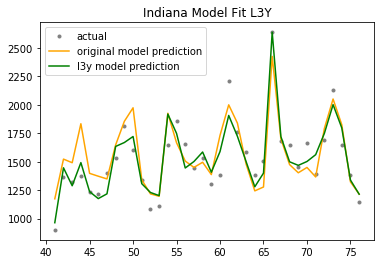

In [21]:
plt.title('Indiana Model Fit L3Y')

line1, = plt.plot(dataL3Y['inleads'],'.',color='grey', label="actual")
line2, = plt.plot(inols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(inols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Indiana L3Y')

# Missouri

<b> Missouri Model </b>

In [22]:
print ("MO Model")
mools = smf.ols('moleads ~ mooffstock + moonstock + natoffon + seasq1 + seasq2 + seasq3 + juldummy', data=data).fit()
print (mools.summary())

MO Model
                            OLS Regression Results                            
Dep. Variable:                moleads   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     65.16
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           6.59e-28
Time:                        12:06:29   Log-Likelihood:                -472.94
No. Observations:                  77   AIC:                             961.9
Df Residuals:                      69   BIC:                             980.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    271.9754     37.270      7.297

In [23]:
print ("MO Model L3Y")
mools_l3y = smf.ols('moleads ~ mooffstock + moonstock + natoffon + seasq1 + seasq2 + seasq3 + juldummy', data=dataL3Y).fit()
print (mools_l3y.summary())

MO Model L3Y
                            OLS Regression Results                            
Dep. Variable:                moleads   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     15.21
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           4.95e-08
Time:                        12:06:29   Log-Likelihood:                -205.18
No. Observations:                  36   AIC:                             426.4
Df Residuals:                      28   BIC:                             439.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    279.0445    118.944      2

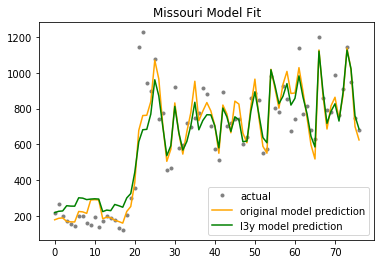

In [24]:
plt.title('Missouri Model Fit')

line1, = plt.plot(data['moleads'],'.',color='grey', label="actual")
line2, = plt.plot(mools.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(mools_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Missouri')

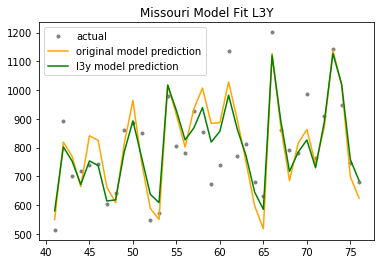

In [25]:
plt.title('Missouri Model Fit L3Y')

line1, = plt.plot(dataL3Y['moleads'],'.',color='grey', label="actual")
line2, = plt.plot(mools.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(mools_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Missouri L3Y')

# Nevada

<b> Nevada model </b>

In [26]:
print ("NV Model")
nvols = smf.ols('nvleads ~ 0 + nvoffstock + nvonstock + nattotstock + seasq1 + seasq3 + seasq4', data=data).fit()
print (nvols.summary())

NV Model
                            OLS Regression Results                            
Dep. Variable:                nvleads   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     209.9
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           4.06e-43
Time:                        12:06:30   Log-Likelihood:                -490.11
No. Observations:                  77   AIC:                             992.2
Df Residuals:                      71   BIC:                             1006.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
nvoffstock      0.0030      0.000      7.

In [27]:
print ("NV Model L3Y")
nvols_l3y = smf.ols('nvleads ~ 0 + nvoffstock + nvonstock + nattotstock + seasq1 + seasq3 + seasq4', data=dataL3Y).fit()
print (nvols_l3y.summary())

NV Model L3Y
                            OLS Regression Results                            
Dep. Variable:                nvleads   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           4.59e-19
Time:                        12:06:30   Log-Likelihood:                -238.31
No. Observations:                  36   AIC:                             488.6
Df Residuals:                      30   BIC:                             498.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
nvoffstock      0.0031      0.001    

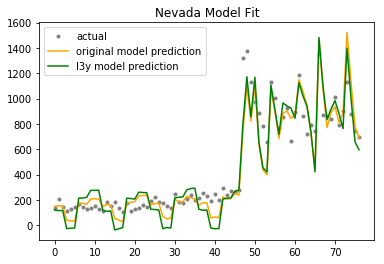

In [28]:
plt.title('Nevada Model Fit')

line1, = plt.plot(data['nvleads'],'.',color='grey', label="actual")
line2, = plt.plot(nvols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(nvols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Nevada')

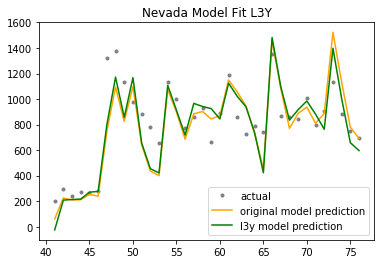

In [29]:
plt.title('Nevada Model Fit L3Y')

line1, = plt.plot(dataL3Y['nvleads'],'.',color='grey', label="actual")
line2, = plt.plot(nvols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(nvols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Nevada L3Y')

# Tennessee

<b> Tennessee Model </b>

In [30]:
print ("TN Model")
tnols = smf.ols('tnleads ~ tnoffstock + tnonstock + natoffon + seasq2 + seasq3 + seasq4 + juldummy', data=data).fit()
print (tnols.summary())

TN Model
                            OLS Regression Results                            
Dep. Variable:                tnleads   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     90.39
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           3.28e-32
Time:                        12:06:30   Log-Likelihood:                -487.71
No. Observations:                  77   AIC:                             991.4
Df Residuals:                      69   BIC:                             1010.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.6739     45.458      6.724

In [31]:
print ("TN Model L3Y")
tnols_l3y = smf.ols('tnleads ~ tnoffstock + tnonstock + natoffon + seasq2 + seasq3 + seasq4 + juldummy', data=dataL3Y).fit()
print (tnols_l3y.summary())

TN Model L3Y
                            OLS Regression Results                            
Dep. Variable:                tnleads   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     14.06
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.13e-07
Time:                        12:06:30   Log-Likelihood:                -220.66
No. Observations:                  36   AIC:                             457.3
Df Residuals:                      28   BIC:                             470.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.5946    243.835      0

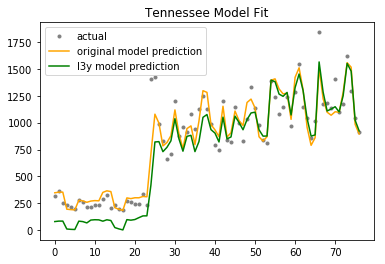

In [32]:
plt.title('Tennessee Model Fit')

line1, = plt.plot(data['tnleads'],'.',color='grey', label="actual")
line2, = plt.plot(tnols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(tnols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Tennessee')

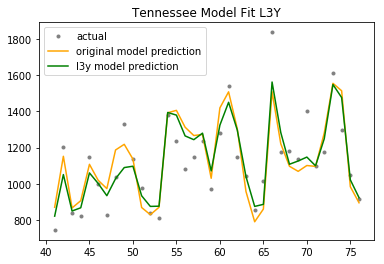

In [33]:
plt.title('Tennessee Model Fit L3Y')

line1, = plt.plot(dataL3Y['tnleads'],'.',color='grey', label="actual")
line2, = plt.plot(tnols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(tnols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Tennessee L3Y')

## Texas

<b> Texas Model </b>

In [34]:
print ("TX Model")
txols = smf.ols('txleads ~ txoffstock + txonstock + natoffon + seasq2 + seasq3 + seasq4', data=data).fit()
print (txols.summary())

TX Model
                            OLS Regression Results                            
Dep. Variable:                txleads   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     43.36
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.11e-21
Time:                        12:06:31   Log-Likelihood:                -570.33
No. Observations:                  77   AIC:                             1155.
Df Residuals:                      70   BIC:                             1171.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1531.2132    173.924      8.804

In [35]:
print ("TX Model L3Y")
txols_l3y = smf.ols('txleads ~ txoffstock + txonstock + natoffon + seasq2 + seasq3 + seasq4', data=dataL3Y).fit()
print (txols_l3y.summary())

TX Model L3Y
                            OLS Regression Results                            
Dep. Variable:                txleads   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     16.82
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           2.89e-08
Time:                        12:06:31   Log-Likelihood:                -261.44
No. Observations:                  36   AIC:                             536.9
Df Residuals:                      29   BIC:                             548.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    538.9633    964.057      0

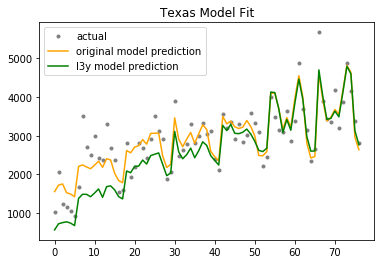

In [36]:
plt.title('Texas Model Fit')

line1, = plt.plot(data['txleads'],'.',color='grey', label="actual")
line2, = plt.plot(txols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(txols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Texas')

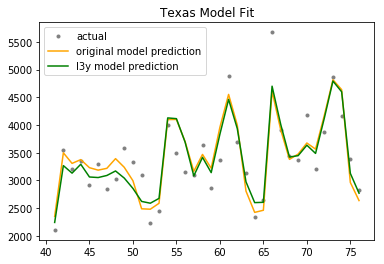

In [37]:
plt.title('Texas Model Fit')

line1, = plt.plot(dataL3Y['txleads'],'.',color='grey', label="actual")
line2, = plt.plot(txols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(txols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Texas L3Y')

# Washington

<b> Washington Model </b>

In [38]:
print ("WA Model")
waols = smf.ols('waleads ~ waoffstock + waonstock + natoffon + juldummy + seasq1 + seasq2 + seasq4', data=data).fit()
print (waols.summary())

WA Model
                            OLS Regression Results                            
Dep. Variable:                waleads   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     49.01
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           2.56e-24
Time:                        12:06:31   Log-Likelihood:                -494.64
No. Observations:                  77   AIC:                             1005.
Df Residuals:                      69   BIC:                             1024.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1396.3355     88.849     15.716

In [39]:
print ("WA Model L3Y")
waols_l3y = smf.ols('waleads ~ waoffstock + waonstock + natoffon + juldummy + seasq1 + seasq2 + seasq4', data=dataL3Y).fit()
print (waols_l3y.summary())

WA Model L3Y
                            OLS Regression Results                            
Dep. Variable:                waleads   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     33.63
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           5.36e-12
Time:                        12:06:31   Log-Likelihood:                -220.90
No. Observations:                  36   AIC:                             457.8
Df Residuals:                      28   BIC:                             470.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1246.3782    184.488      6

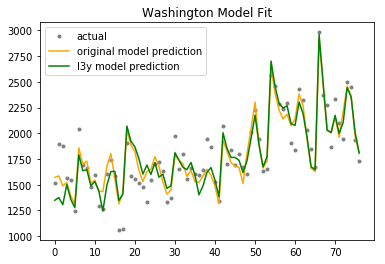

In [40]:
plt.title('Washington Model Fit')

line1, = plt.plot(data['waleads'],'.',color='grey', label="actual")
line2, = plt.plot(waols.predict(data),'-',color='orange', label="original model prediction")
line3, = plt.plot(waols_l3y.predict(data),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Washington')

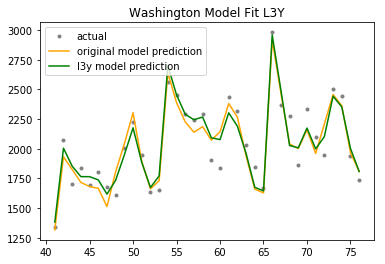

In [41]:
plt.title('Washington Model Fit L3Y')

line1, = plt.plot(dataL3Y['waleads'],'.',color='grey', label="actual")
line2, = plt.plot(waols.predict(dataL3Y),'-',color='orange', label="original model prediction")
line3, = plt.plot(waols_l3y.predict(dataL3Y),'-',color='green', label="l3y model prediction")

plt.legend()

plt.savefig('Model Fits/Washington L3Y')